# This is a notebook to explore the station data in Central Asia 

In [1]:
import pandas as pd
# import the python libraries here: 
import os
import urllib.request as ureq
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset as NetCDFFile
import scipy.stats as stats
from mpl_toolkits.basemap import Basemap
import seaborn as sn

In [2]:
file_1 = '../Precip_v1_1.txt'


In [3]:

data = pd.read_csv(file_1, sep="\t", header=0)

In [4]:
data.head()

Country  Code_WMO    Name   Long    Lat  Alt  Years     I    II   III  \
0      211   36870.0  Almaty  76.93  43.23  847   1879  25.0  24.0  18.0   
1      211   36870.0  Almaty  76.93  43.23  847   1880  34.0  20.0  67.0   
2      211   36870.0  Almaty  76.93  43.23  847   1881  14.0  51.0  50.0   
3      211   36870.0  Almaty  76.93  43.23  847   1882  68.0  34.0  33.0   
4      211   36870.0  Almaty  76.93  43.23  847   1883  30.0   4.0  37.0   

      IV      V    VI   VII  VIII    IX      X     XI   XII  
0   87.0   32.0  23.0  36.0  37.0  29.0   41.0   31.0  43.0  
1   61.0  145.0  20.0  29.0  49.0   4.0   25.0   24.0  32.0  
2  102.0   62.0  89.0  40.0  28.0  73.0   47.0  110.0  21.0  
3  154.0  126.0  77.0  24.0  28.0  33.0  123.0   12.0  16.0  
4   58.0   37.0  89.0  29.0   4.0  20.0   30.0   12.0  37.0

In [5]:
len(set(data.Long))

238

In [6]:
len(set(data.Lat))

210

In [7]:
len(set(data.Name))

270

In [15]:
# load the map
factor = 1 #57.29577951308232
m = Basemap(llcrnrlon=47.5/factor, llcrnrlat=28.5/factor, urcrnrlon=89.7/factor, urcrnrlat=60./factor,resolution='h') 
#http://server.arcgisonline.com/arcgis/rest/services

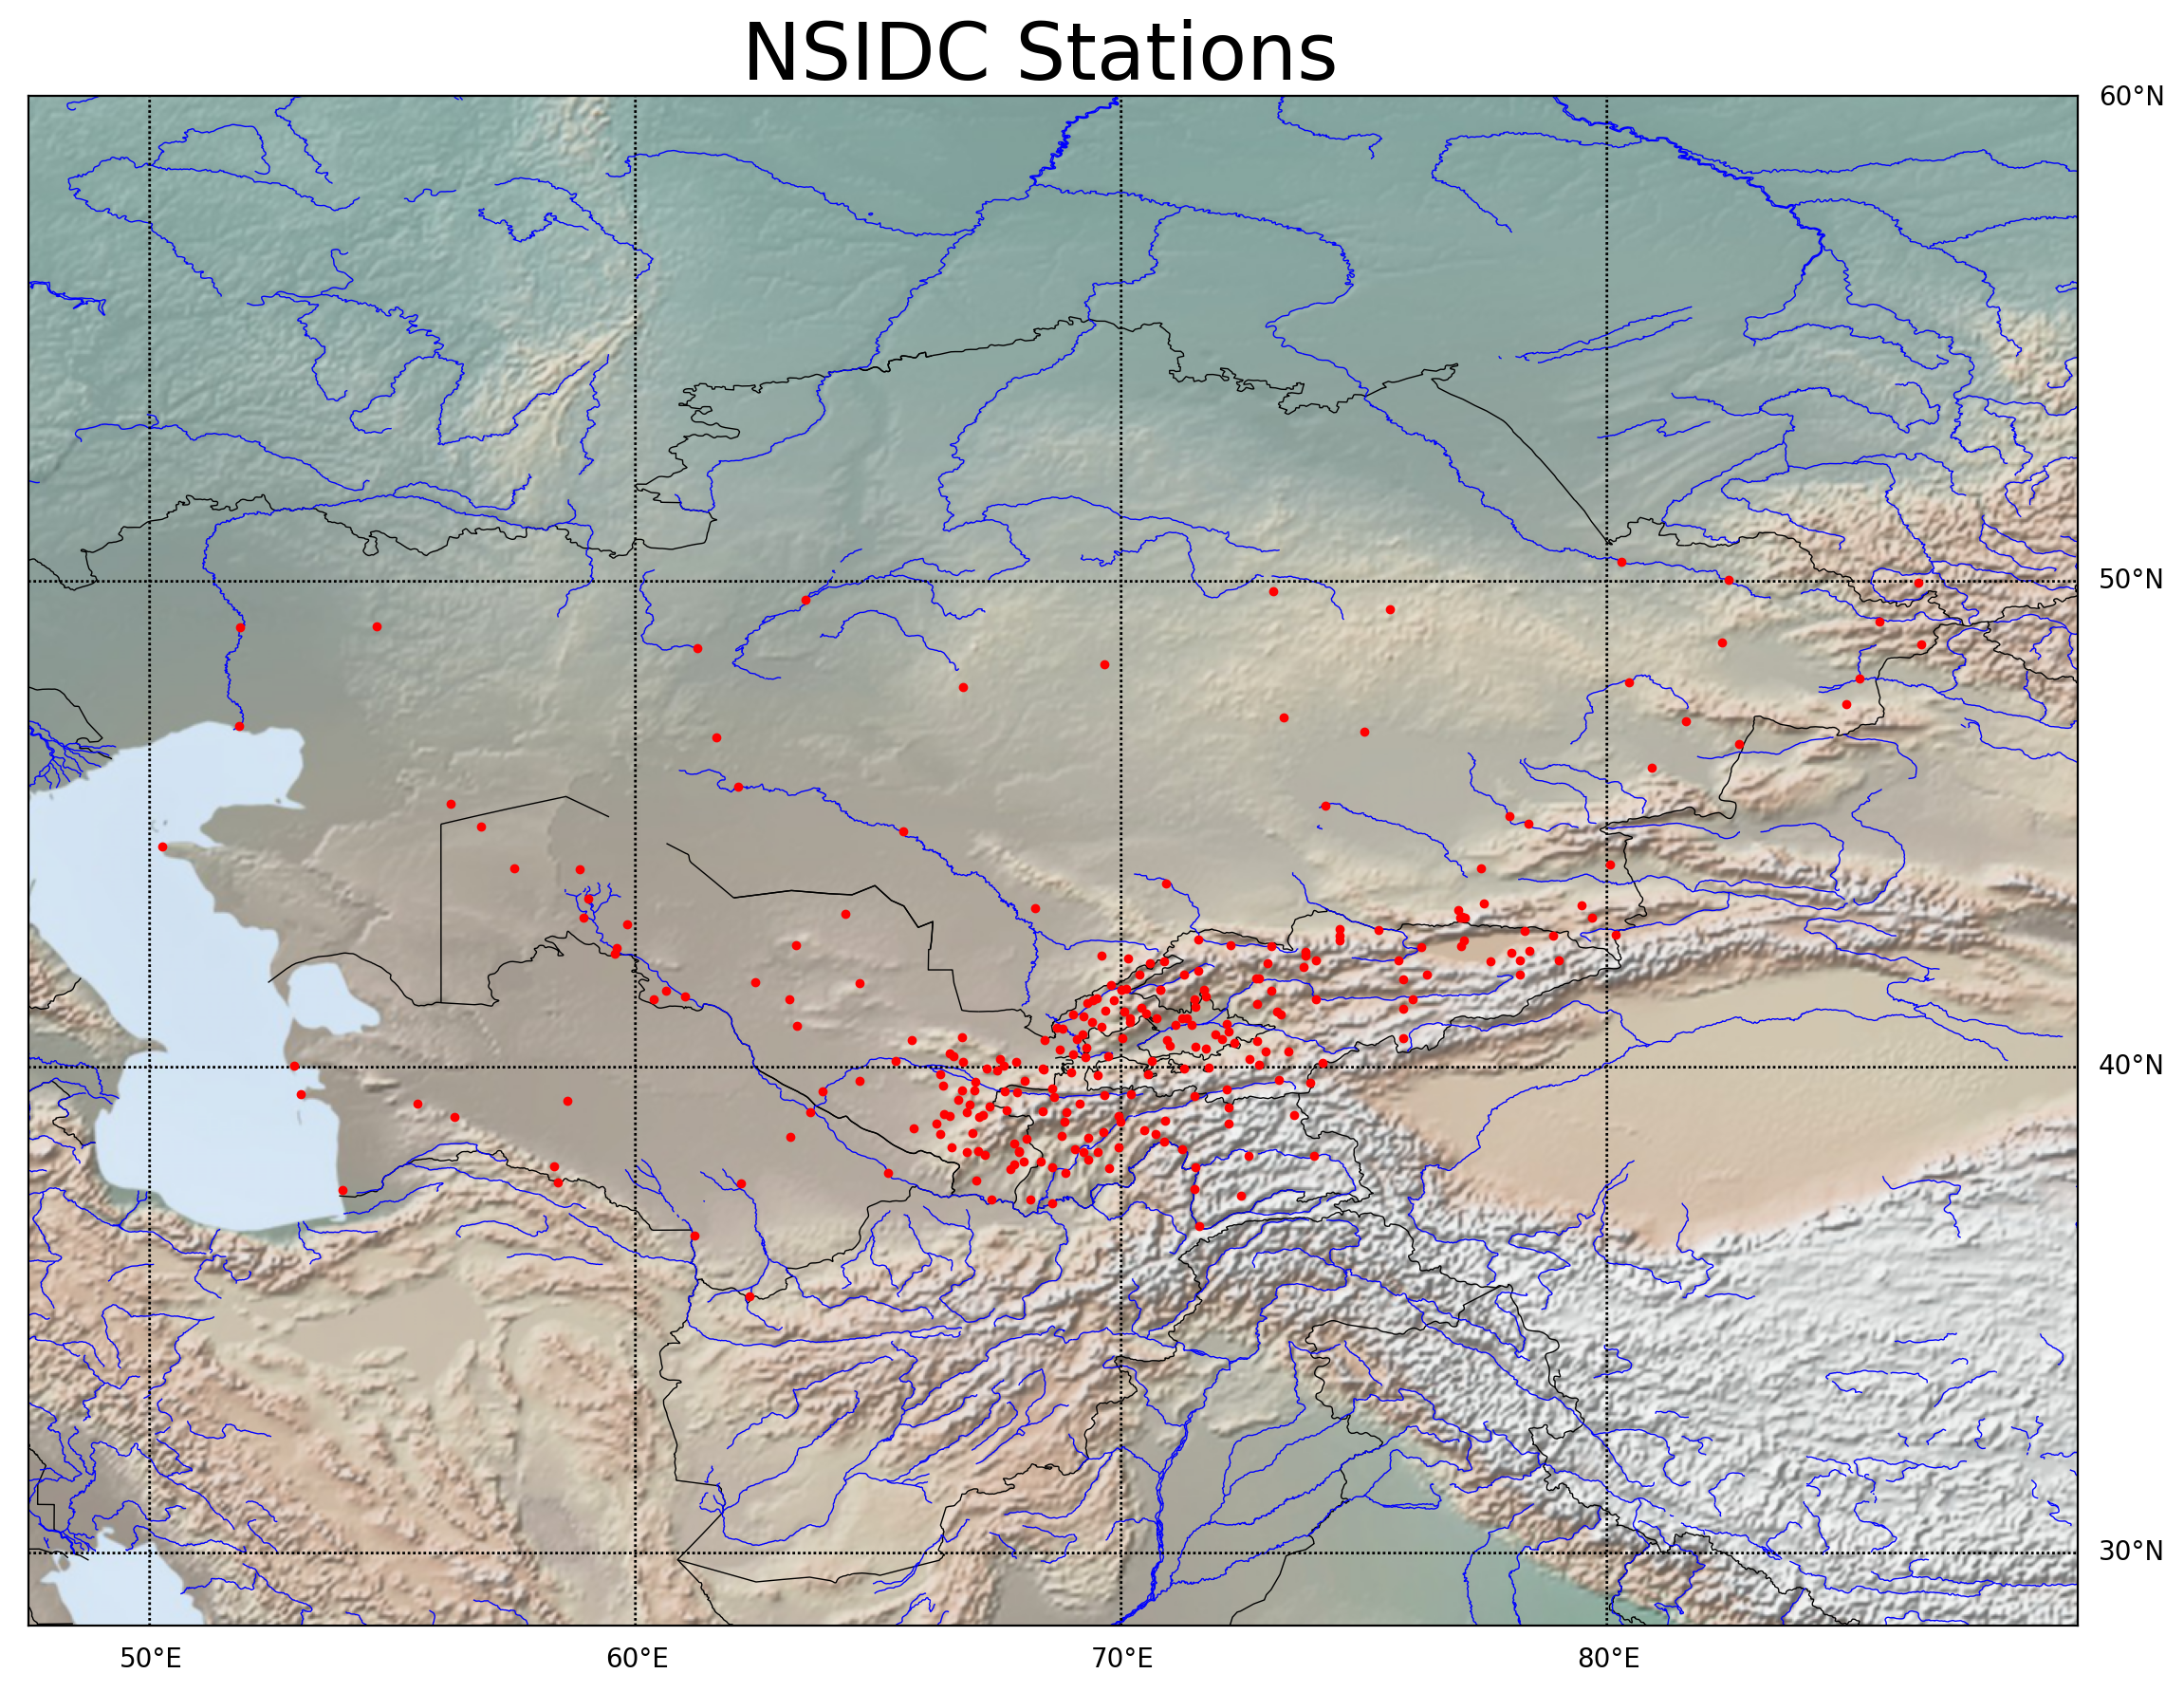

In [19]:

my_dpi=200

plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

m.drawcountries(linewidth=0.5, linestyle='solid', color='black', antialiased=1, ax=None)
#m.drawcoastlines()
m.shadedrelief()
m.drawrivers(color="blue")
#m.bluemarble()
#m.etopo()
#cmap = plt.cm.get_cmap("bwr", 24)
#m.arcgisimage(service='NatGeo_World_Map', xpixels = 2000, verbose= True)




#plt.xlabel("Longitude", fontsize=20)
#plt.ylabel("Latitude", fontsize=20)
parallels = np.arange(0.,81,10.)
#labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,10.)
m.drawmeridians(meridians,labels=[True,False,False,True])
#m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 500, verbose= True,zorder=10)
for station in list(set(data.Name)):
    xpt,ypt = m(data[data.Name==station].Long.values[0],data[data.Name==station].Lat.values[0])
    m.plot(xpt,ypt,'r.',alpha=1, markersize=5)





plt.title("NSIDC Stations ", fontsize=30)
plt.tight_layout()
#plt.savefig('Bias_Map.png', format='png');

In [10]:
# other stations available in the region? 

- FIPS Country Code Two-Letter Identifier
- IR, TX, UZ, KZ, KG, TI, AF



In [11]:
# run it once!
#!wget --spider -r --no-parent https://www.ncei.noaa.gov/data/gsom/

In [12]:
txt_dir = "./www.ncei.noaa.gov/data/gsom/access/index.html.tmp.tmp"

obs_files = []
with open(txt_dir) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        #print("Line {}: {}".format(cnt, line.strip()))
        if cnt > 12 : 
            s = line.strip()
            start = s.find("href=") + len("href=")
            end = s.find('.csv">')
            substring = s[start:end]
            #print(substring[1:]+".csv")
            obs_files.append(substring[1:]+".csv")
        line = fp.readline()
        cnt += 1


In [13]:
# delete the last 3 as they are crapp
obs_files[-3:]=[]

In [14]:
##run once!!!
#import os
#url = "https://www.ncei.noaa.gov/data/gsom/access/"
#coun = ["IR", "TX", "UZ", "KZ", "KG", "TI", "AF"]
#
#counter = 0
#for station in obs_files: 
#    if station[0:2] in coun:
#        #print(url+station)
#        os.system("wget "+url+station)
#        counter += 1
#print(counter)

In [23]:
#test data KG000036994.csv
file="KG000036994.csv"
data = pd.read_csv(file, sep=",")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
STATION            238 non-null object
DATE               238 non-null object
LATITUDE           238 non-null float64
LONGITUDE          238 non-null float64
ELEVATION          238 non-null float64
NAME               238 non-null object
DP01               238 non-null int64
DP01_ATTRIBUTES    238 non-null object
DP10               238 non-null int64
DP10_ATTRIBUTES    238 non-null object
DP1X               238 non-null int64
DP1X_ATTRIBUTES    238 non-null object
EMXP               238 non-null float64
EMXP_ATTRIBUTES    238 non-null object
PRCP               238 non-null float64
PRCP_ATTRIBUTES    238 non-null object
dtypes: float64(5), int64(3), object(8)
memory usage: 29.9+ KB


In [ ]:
#ftp://ftp.ncei.noaa.gov/pub/data/noaa/isd-lite/2008/
# how about era5 vs the obs? elevation corection 
# new papers on rcm in central asia ? 
